 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
csv_whale = Path("./Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_df = pd.read_csv(csv_whale, index_col=['Date'], infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
csv_algo = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(csv_algo, index_col=['Date'], infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
csv_sp_tsx = Path("./Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(csv_sp_tsx, index_col=['Date'], infer_datetime_format=True, parse_dates=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "", regex=True).replace(",", "", regex=True)
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype(float)

In [12]:
# Check Data type again
sp_tsx_df["Close"].dtype


dtype('float64')

In [13]:
#Calculate daily returns
daily_returns = sp_tsx_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()


Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={'Close': 'S&P_return'})
daily_returns

,S&P_return
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns.head()

,S&P_return
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [17]:
column_appended_data = pd.concat([whale_df, algo_df, daily_returns], axis="columns", join="inner")
column_appended_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [18]:
# Plot daily returns of all portfolios
daily_returns = column_appended_data.pct_change()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.604848
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.398717
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-8.420220
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-0.342692


In [19]:
daily_returns.plot

#### Calculate and Plot cumulative returns.

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.604848
2015-03-05,-4.173432,-1.818399,-5.751772,-2.024002,-0.508246,-5.553173,-1.157554
2015-03-06,5.246788,-0.282397,16.115278,0.994020,1.552226,11.070068,0.169085
2015-03-09,-1.460116,-1.848387,-12.790828,-0.748434,1.804686,-2.372559,-0.231550
...,...,...,...,...,...,...,...
2019-04-25,NaN,NaN,NaN,NaN,-1.351401,6.633059,-0.926350
2019-04-26,NaN,NaN,NaN,NaN,-2.534987,-6.535269,-1.264231
2019-04-29,NaN,NaN,NaN,NaN,-3.681558,-3.979875,-0.907628


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

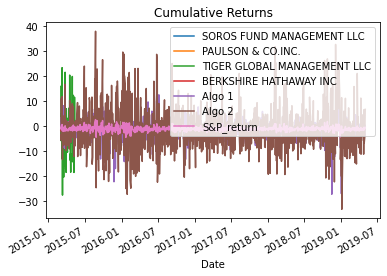

In [21]:
# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

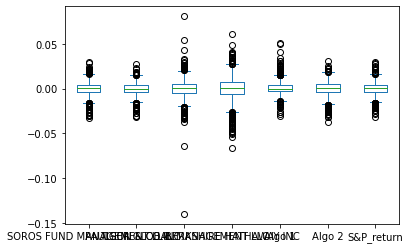

In [22]:
# Box plot to visually show risk
column_appended_data.plot.box()

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = column_appended_data.std()
all_portfolio_std.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_returns_std = daily_returns.std()
daily_returns_std.head()

SOROS FUND MANAGEMENT LLC            NaN
PAULSON & CO.INC.                    NaN
TIGER GLOBAL MANAGEMENT LLC          NaN
BERKSHIRE HATHAWAY INC               NaN
Algo 1                         15.995448
dtype: float64

In [25]:
# Determine which portfolios are riskier than the S&P TSX 60

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = column_appended_data * np.sqrt(252)
annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,-0.135407
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.053506
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.021334
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.158302
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.086469,0.020688,-0.104054


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

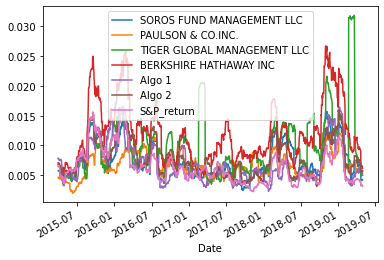

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window and plot the rolling standard deviation
column_appended_data.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
correlation = column_appended_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P_return,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

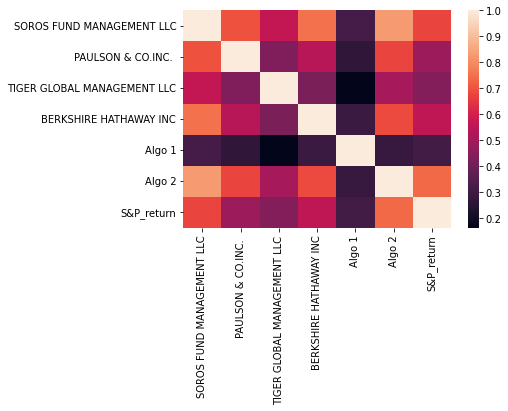

In [29]:
# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [30]:
# Calculate covariance of a single portfolio
algo_covariance = algo_df.cov()
algo_covariance

,Algo 1,Algo 2
Algo 1,0.000064,0.000023
Algo 2,0.000023,0.000072


In [31]:
# Calculate variance of S&P TSX
variance = daily_returns["S&P_return"].var()
print(f"S&P TSX variance: {variance}")

S&P TSX variance: 47118.41366421351


In [32]:
# Computing beta
algo_beta = algo_covariance / variance
algo_beta

,Algo 1,Algo 2
Algo 1,1.354111e-09,4.974186e-10
Algo 2,4.974186e-10,1.521294e-09


<AxesSubplot:>

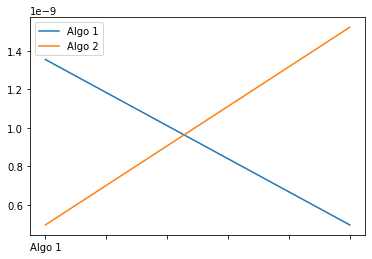

In [33]:
# Plot beta trend
algo_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [34]:
# Use `ewm` to calculate the rolling wind
column_appended_data.ewm(com=0.5).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.001356,0.001186,-0.002024,0.001518,-0.006927,0.001575,-0.004660
2015-03-05,0.003198,0.003187,0.001007,0.005124,-0.002793,0.003478,-0.000504
2015-03-06,-0.004297,-0.001377,-0.005397,-0.007176,-0.004253,-0.006606,-0.006895
2015-03-09,-0.001031,0.002373,0.002127,-0.003478,-0.005052,-0.001311,-0.006667
...,...,...,...,...,...,...,...
2019-04-25,0.000791,-0.000567,-0.003942,0.002792,0.001042,-0.004101,-0.001123
2019-04-26,0.005697,0.005919,0.006922,0.007887,0.002335,0.002137,0.001128
2019-04-29,0.002735,0.003786,0.006475,0.006111,0.004250,0.002599,-0.000149


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
sharpe_ratio = (column_appended_data.mean() * 252) / (column_appended_data.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P_return                     0.195550
dtype: float64

<AxesSubplot:>

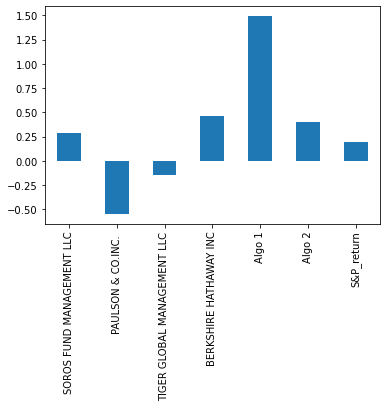

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Reading data from 1st stock and index date with index symbol
csv_shop = Path("./Resources/shop_historical.csv")
shop_df = pd.read_csv(csv_shop, index_col=['Date'], infer_datetime_format=True, parse_dates=True)
shop_df.drop(columns = ["Symbol"], inplace=True)
shop_df.rename(columns={"Close": "SHOP"}, inplace=True)
shop_df.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [38]:
# Reading data from 2nd stock and index date with index symbol
csv_otex = Path("./Resources/otex_historical.csv")
otex_df = pd.read_csv(csv_otex, index_col=['Date'], infer_datetime_format=True, parse_dates=True)
otex_df.drop(columns = ["Symbol"], inplace=True)
otex_df.rename(columns = {"Close": "OTEX"}, inplace=True)
otex_df.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [39]:
# Reading data from 3rd stock and index date with index symbol
csv_l = Path("./Resources/l_historical.csv")
l_df = pd.read_csv(csv_l, index_col=['Date'], infer_datetime_format=True, parse_dates=True)
l_df.drop(columns = ["Symbol"], inplace=True)
l_df.rename(columns = {"Close": "L"}, inplace = True)
l_df.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [40]:
# Combine all stocks in a single DataFrame
combined_data = pd.concat([shop_df, otex_df, l_df], axis="columns", join="inner")
combined_data

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [41]:
#combined_data["SHOP"] = combined_data["SHOP"].astype(float)

In [42]:
# Calculate daily returns
daily_returns = combined_data.pct_change()
daily_returns.head()

,SHOP,OTEX,L
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753


In [43]:
# Drop NAs
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

SHOP    0
OTEX    0
L       0
dtype: int64

<AxesSubplot:xlabel='Date'>

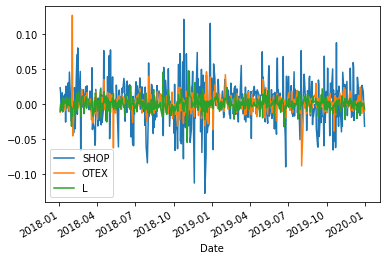

In [44]:
# Display sample data
daily_returns.plot()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

<AxesSubplot:xlabel='Date'>

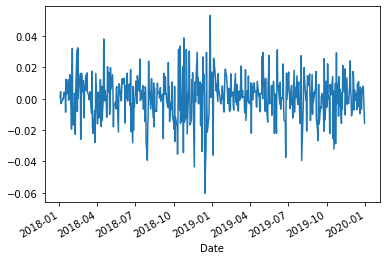

In [46]:
# Display sample data
portfolio_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [47]:
# Join your returns DataFrame to the original returns DataFrame
joined_dataframes = pd.concat([column_appended_data, portfolio_returns],axis="columns",join="inner")
joined_dataframes.rename(columns = {0: "Alpha Portfolio"}, inplace=True)
joined_dataframes

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return,Alpha Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_dataframes.dropna(inplace=True)
joined_dataframes.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P_return                     0
Alpha Portfolio                0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [49]:
# Calculate the annualized `std`
reannualized_std = joined_dataframes * np.sqrt(252)
reannualized_std    

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return,Alpha Portfolio
Date,,,,,,,,
2018-01-03,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059916,0.008964
2018-01-04,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,0.040133,0.071707
2018-01-05,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,-0.061417,-0.049627
2018-01-08,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,-0.030867,-0.015830
2018-01-09,-0.016311,0.013847,0.028401,0.011244,-0.015939,-0.033187,0.001547,-0.015853
...,...,...,...,...,...,...,...,...
2019-04-25,-0.004522,-0.020491,-0.081804,0.076956,0.010834,-0.115050,-0.009973,0.054942
2019-04-26,0.129369,0.145437,0.196127,0.165633,0.047324,0.083431,0.035779,0.051484
2019-04-29,0.019912,0.043165,0.099226,0.082917,0.082673,0.044914,-0.012508,0.052435


### Calculate and plot rolling `std` with 21-day window

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return,Alpha Portfolio
Date,,,,,,,,
2018-01-03,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059916,0.008964
2018-01-04,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,0.040133,0.071707
2018-01-05,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,-0.061417,-0.049627
2018-01-08,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,-0.030867,-0.015830
2018-01-09,-0.016311,0.013847,0.028401,0.011244,-0.015939,-0.033187,0.001547,-0.015853
...,...,...,...,...,...,...,...,...
2019-04-25,-0.004522,-0.020491,-0.081804,0.076956,0.010834,-0.115050,-0.009973,0.054942
2019-04-26,0.129369,0.145437,0.196127,0.165633,0.047324,0.083431,0.035779,0.051484
2019-04-29,0.019912,0.043165,0.099226,0.082917,0.082673,0.044914,-0.012508,0.052435


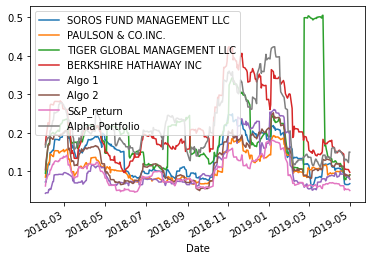

In [50]:
# Calculate rolling standard deviation
reannualized_std.rolling(window=21).std().plot()
reannualized_std.dropna()

### Calculate and plot the correlation

In [51]:
# Calculate and plot the correlation
correlation = joined_dataframes.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return,Alpha Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P_return,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
Alpha Portfolio,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


<AxesSubplot:>

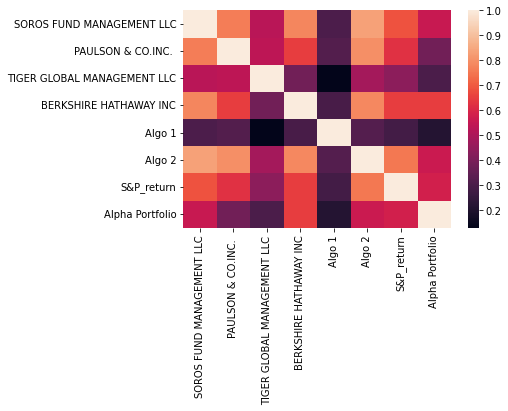

In [52]:
#plot the correlation
sns.heatmap(correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

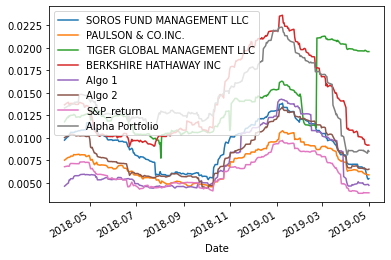

In [53]:
# Calculate covariance of all portfolios
joined_dataframes.rolling(window=60).std().plot()

In [54]:
# to calculate covariance of the portfolio
joined_dataframes_covar = joined_dataframes.cov()
joined_dataframes_covar

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return,Alpha Portfolio
SOROS FUND MANAGEMENT LLC,0.000084,0.000051,0.000067,0.000103,0.000021,0.000066,0.000039,0.000072
PAULSON & CO.INC.,0.000051,0.000052,0.000054,0.000067,0.000017,0.000050,0.000028,0.000039
TIGER GLOBAL MANAGEMENT LLC,0.000067,0.000054,0.000192,0.000076,0.000014,0.000058,0.000038,0.000059
BERKSHIRE HATHAWAY INC,0.000103,0.000067,0.000076,0.000205,0.000032,0.000097,0.000058,0.000131
Algo 1,0.000021,0.000017,0.000014,0.000032,0.000057,0.000021,0.000013,0.000023
Algo 2,0.000066,0.000050,0.000058,0.000097,0.000021,0.000075,0.000041,0.000069
S&P_return,0.000039,0.000028,0.000038,0.000058,0.000013,0.000041,0.000039,0.000051
Alpha Portfolio,0.000072,0.000039,0.000059,0.000131,0.000023,0.000069,0.000051,0.000200


In [55]:
#calculate variance of S&P TSX
variance_2 = joined_dataframes["S&P_return"].var()
print(f"S&P TSX variance: {variance_2}")

S&P TSX variance: 3.898788619333669e-05


In [56]:
#Calculating beta
joined_dataframes_beta = joined_dataframes_covar / variance_2
joined_dataframes_beta

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_return,Alpha Portfolio
SOROS FUND MANAGEMENT LLC,2.159918,1.295558,1.716791,2.638559,0.543730,1.703199,1.009191,1.849772
PAULSON & CO.INC.,1.295558,1.330736,1.372682,1.713700,0.447798,1.277703,0.719517,1.006012
TIGER GLOBAL MANAGEMENT LLC,1.716791,1.372682,4.918741,1.955809,0.351398,1.494708,0.973140,1.525849
BERKSHIRE HATHAWAY INC,2.638559,1.713700,1.955809,5.265297,0.818848,2.496148,1.491085,3.362369
Algo 1,0.543730,0.447798,0.351398,0.818848,1.466337,0.541263,0.344858,0.588630
Algo 2,1.703199,1.277703,1.494708,2.496148,0.541263,1.928913,1.047647,1.772149
S&P_return,1.009191,0.719517,0.973140,1.491085,0.344858,1.047647,1.000000,1.310998
Alpha Portfolio,1.849772,1.006012,1.525849,3.362369,0.588630,1.772149,1.310998,5.122770


<AxesSubplot:>

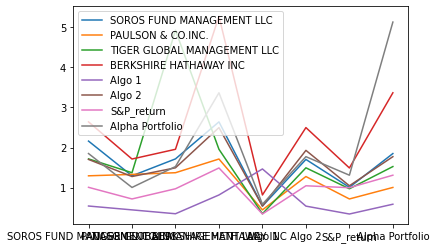

In [57]:
joined_dataframes_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [58]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_2 = (joined_dataframes.mean() * 252) / (joined_dataframes.std() * np.sqrt(252))
sharpe_ratio_2


SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P_return                     0.034651
Alpha Portfolio                1.564547
dtype: float64

<AxesSubplot:>

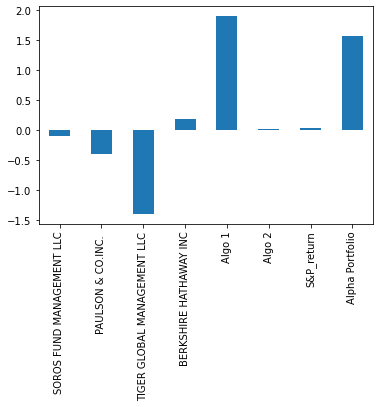

In [59]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_2.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
Algo1 portfolio has the highest correlation compared to all.